# How cool is cucumber? Experiments with word embedding

We all know old, good and hackneyed examples, that are typically used to intuitively explain, what the **word embedding** technique is. We almost always come across a chart presenting a simplified, 2-dimensional vector representation of words **queen** and **king**, which are distant from each other in the similar length as words **woman** and **man**. 

One of the most convenient ways to get **embedding vectors** for natural language is to use pre-trained models distributed with [**spacy**](https://spacy.io/) library.

In [1]:
import numpy as np
import numpy.typing as npt
import spacy
import matplotlib.pyplot as plt
# Installing en_core_web_md

In [2]:
nlp = spacy.load('en_core_web_md')

In [3]:
fire = nlp('fire')
ice = nlp('ice')

In [4]:
len(fire.vector)

300

A couple of simple function calls, but there is a lot work done behind the scene. In fact, we can use **nlp** object to process whole sentences (or documents) at once. For now, we only need to process single words.

## Adding a new axis

The experiment I'd like to conduct is to "draw" a straight line in n-dimensional space and treat it as a new axis. It's possible if we project the considered points on this line.

## Line in n-dimensional space

First of all, we find an equation of a line generalized to n-dimensional space. Such straight line can be unambiguously determined using a point lying on this line and so-called **direction vector**.

<center>
$\vec{d} = (l, m, n, ...)$
</center>

Given the points $A = (x, y, z)$ and $B = (x_{1}, y_{1}, z_{1})$, it's simply computed as a elementwise difference between these two points, namely:

<center>
$ \vec{d} = A - B = (x, y, z, ...) - (x_{1}, y_{1}, z_{1}, ...) $
</center>

In our case, it can be defined as follows:

In [5]:
direction = fire.vector - ice.vector

Complete equation:

<center>
$ \frac{x - x_{1}}{l}  = \frac{y - y_{1}}{m} = \frac{z - z_{1}}{n} =   \ ...$
</center>



We also will use a **midpoint** between two initial points as beginining of our new axis.
It can be calculated with the following formula:

<center>
$  M = (\frac{x + x_{1}}{2}, \frac{y + y_{1}}{2}, \frac{z + z_{1}}{2}, ...) $
</center>

Writing that as a function:

In [6]:
def midpoint(x: npt.NDArray, y: npt.NDArray) -> npt.NDArray:
    if (len(x) != len(y)):
        raise ValueError(
            'Vectors come from different spaces! ' + 
            'x: {} dimensions, y: {} dimensions'.format(len(x), len(y)))
    return (x + y) / 2

In [7]:
# midpoint(np.array([2, 3]), np.array([-1, 20]))
# midpoint(np.array([2, 3]), np.array([-1, 20, -45]))

In [8]:
mid = midpoint(fire.vector, ice.vector)

Two values that we need for the moment:
* ```mid```
* ```direction```

## Distance from a new point to the beggining of the axis

Next, we compute distance from a point to the begining of the aforementioned new axis.

In [9]:
# https://math.stackexchange.com/questions/1905533/find-perpendicular-distance-from-point-to-line-in-3d
# https://onlinemschool.com/math/library/analytic_geometry/p_line/

In [10]:
cucumber = nlp('cucumber')

<center>
$\overline{MC} = M - C $
<\center>

In [11]:
mc_dist = mid - cucumber.vector

## Projection

In [12]:
projection_dist = mc_dist @ direction

In [13]:
projection_dist

6.8615074

Rewriting all as a function

In [22]:
class axis:
    
    def __init__(self, x, y):
        self.x = x 
        self.y = y
        self.mid = midpoint(x, y)
        self.direction = (x - self.mid) / np.linalg.norm(x - self.mid)
        
        self.pole_x = self(x)
        self.pole_y = self(y)
        
    def __call__(self, vec):
        mc_dist = vec - self.mid 
        return mc_dist @ self.direction

In [23]:
## Simplified example in 2-dimensional space

In [24]:
# To discover potential bugs in the code we've written, 
# we make a simple experiment using a comprehensible example in 2-dimensional space.

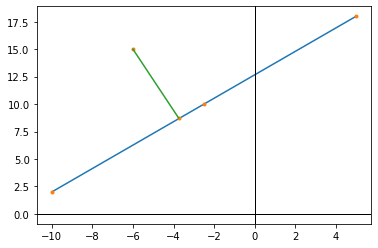

1.2538920696157714

In [39]:
# Points lying on the straight line
a = np.array([-10, 2])
b = np.array([5, 18])

line_a_b = axis(a, b)
mid_a_b = line_a_b.mid

c = np.array([-6, 15])
proj_c = mid_a_b + (c - mid_a_b) @ line_a_b.direction

points = [a, b, mid_a_b, c, proj_c]

points_x = [x[0] for x in points]
points_y = [x[1] for x in points]


plt.plot([a[0], b[0]], [a[1], b[1]])
plt.plot(points_x, points_y, '.')
# Line
plt.plot([c[0], proj_c[0]], [c[1], proj_c[1]], '-')
plt.axhline(linewidth=1, color='black')
plt.axvline(linewidth=1, color='black')
plt.show()



(mid_a_b - c) @ line_a_b.direction

In [29]:
ice_fire_axis = axis(ice.vector, fire.vector)

In [35]:
# Ice
ice_fire_axis.pole_x

# Fire
ice_fire_axis.pole_y

-4.104704

In [32]:
fire_ice_axis(nlp('icecream').vector)

-1.5802484

In [38]:
fire_ice_axis(nlp('polar').vector)

-1.3376286